In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
df = pd.read_csv(r"C:\Users\DELL\Downloads/house_prices_portfolio.csv")

## Problem Statement
This project aims to predict house prices using multiple regression techniques, identify the most influential features affecting property values, and compare model performance based on accuracy and stability.

In [19]:
df.head()

,House_Price,Lot_Size,Bedrooms,Bathrooms,House_Age,Distance_to_CityCenter,Crime_Rate,Nearby_Schools,Monthly_Income,Renovated,Energy_Efficiency_Score,Garden_Size,Noise_Level
0,89.96,2000,3,3,45,8.25,70.22,6,4158.35,0,56.29,125.1,8.38
1,9.92,1256,2,2,45,23.82,68.95,7,5658.32,1,80.23,136.6,3.99
2,175.77,2000,7,5,38,3.45,72.10,8,4652.73,0,60.33,375.4,8.45
3,57.77,2000,2,2,35,7.27,93.98,4,2381.04,0,44.46,308.8,8.45
4,74.11,913,3,3,7,8.87,89.90,6,2527.46,1,50.01,260.5,7.66


### Columns (quick reference)
- **House_Price** *(target, $1,000s)*  
- **Lot_Size, Bedrooms, Bathrooms, House_Age**  
- **Distance_to_CityCenter, Crime_Rate, Nearby_Schools**  
- **Monthly_Income, Renovated, Energy_Efficiency_Score**  
- **Garden_Size, Noise_Level**

###  House Prices Portfolio Data Dictionary

| **Column**                | **Type**             | **Notes**                                                                 |
|----------------------------|----------------------|--------------------------------------------------------------------------|
| **House_Price**            | float (1,000s)       | Target variable                                                          |
| **Lot_Size**               | int (m²)             | Land area; drives price; induces heteroscedasticity                      |
| **Bedrooms**               | int (count)          | More bedrooms generally increase price                                   |
| **Bathrooms**              | int (count)          | Correlated with bedrooms; affects price                                  |
| **House_Age**              | int (years)          | Older homes tend to be cheaper                                           |
| **Distance_to_CityCenter** | float (km)           | Further is cheaper on average                                            |
| **Crime_Rate**             | float (0–100 index)  | Higher crime lowers price                                                |
| **Nearby_Schools**         | int (count)          | More schools generally increase price                                    |
| **Monthly_Income**         | float ($)            | Large scale; correlated with energy score                                |
| **Renovated**              | int (0/1)            | Recently renovated boosts price                                          |
| **Energy_Efficiency_Score**| float (0–100)        | Correlated with income & renovation                                      |
| **Garden_Size**            | float (m²)           | Weak/low signal; useful for LASSO demonstration                          |
| **Noise_Level**            | float (0–10)         | Weak/low signal; inversely correlated with price; LASSO may drop         |


The dataset contains housing attributes such as number of bedrooms, bathrooms, square footage, and other structural features that potentially influence house prices. Initial inspection was carried out to understand data structure, feature types, and potential quality issues.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   House_Price              500 non-null    float64
 1   Lot_Size                 500 non-null    int64  
 2   Bedrooms                 500 non-null    int64  
 3   Bathrooms                500 non-null    int64  
 4   House_Age                500 non-null    int64  
 5   Distance_to_CityCenter   500 non-null    float64
 6   Crime_Rate               500 non-null    float64
 7   Nearby_Schools           500 non-null    int64  
 8   Monthly_Income           500 non-null    float64
 9   Renovated                500 non-null    int64  
 10  Energy_Efficiency_Score  500 non-null    float64
 11  Garden_Size              500 non-null    float64
 12  Noise_Level              500 non-null    float64
dtypes: float64(7), int64(6)
memory usage: 50.9 KB


In [21]:
df.shape

(500, 13)

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
House_Price,500.0,98.98948,44.772335,-41.29,69.6650,99.385,129.3425,334.62
Lot_Size,500.0,1690.90400,342.192294,736.00,1431.5000,1810.000,2000.0000,2000.00
Bedrooms,500.0,3.97400,1.631763,1.00,3.0000,4.000,5.0000,7.00
Bathrooms,500.0,3.06000,1.584115,1.00,2.0000,3.000,4.0000,6.00
House_Age,500.0,33.88800,19.538346,0.00,17.0000,34.000,50.0000,69.00
Distance_to_CityCenter,500.0,8.94238,5.910477,1.42,5.0175,7.460,11.1600,40.00
Crime_Rate,500.0,70.79916,13.476801,25.32,61.7900,71.085,81.1850,95.00
Nearby_Schools,500.0,6.67000,2.105699,2.00,5.0000,7.000,8.0000,14.00
Monthly_Income,500.0,4514.20640,1492.544152,1500.00,3409.3700,4510.395,5487.3700,8767.94
Renovated,500.0,0.29200,0.455138,0.00,0.0000,0.000,1.0000,1.00


In [23]:
corr = df.corr()['House_Price'].sort_values()
corr

Crime_Rate                -0.490324
Distance_to_CityCenter    -0.409821
House_Age                 -0.272099
Renovated                  0.135616
Garden_Size                0.144462
Lot_Size                   0.179512
Noise_Level                0.325410
Energy_Efficiency_Score    0.350907
Monthly_Income             0.384082
Nearby_Schools             0.403098
Bathrooms                  0.492771
Bedrooms                   0.525954
House_Price                1.000000
Name: House_Price, dtype: float64

In [24]:
corr = df.corr()

<Axes: >

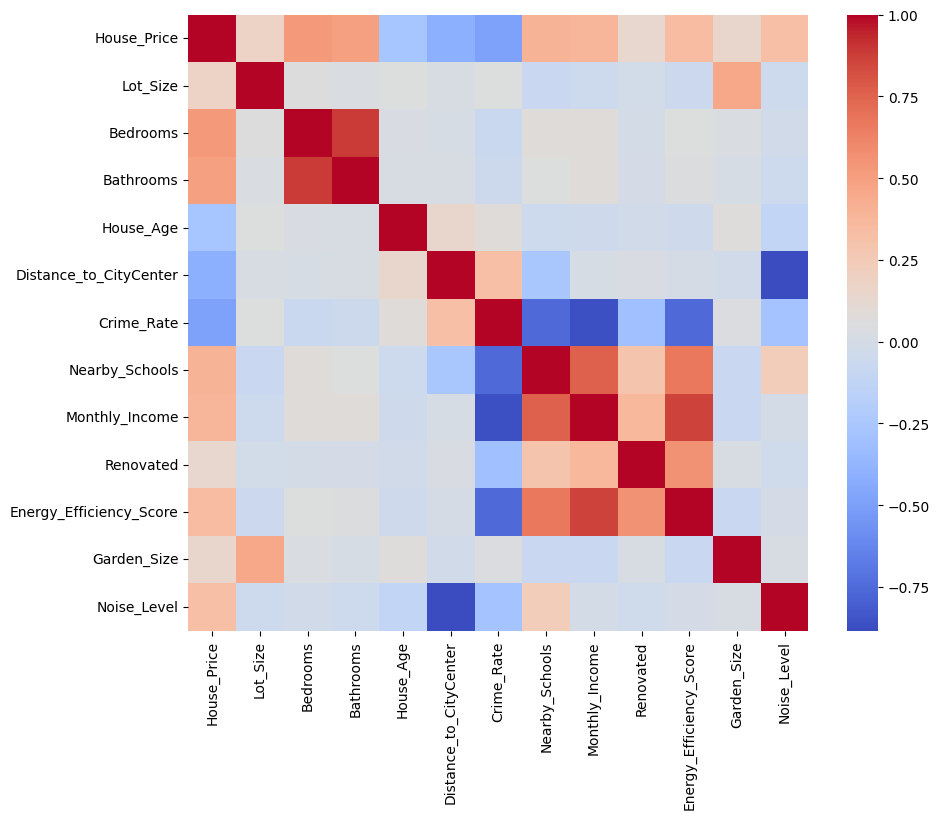

In [25]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr, cmap = 'coolwarm')

### Observation
From the heatmap:
- Noise_level and Distance to city center are strongly negatively coorelated. meaning houses close to the city center are prone to noise.
- Monthly income & crime rate are also strongly negatively coorelated meaning houses where monthly income is high have more crimes than the others
- Also number of Bedrooms and Bathrooms are positively correlated.

In [26]:
df1 = df.copy() # a copy of the dataset

In [27]:
x = df.drop(columns = ['House_Price'])
y = df['House_Price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=45)

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)   

In [31]:
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [32]:
print(f'Train mse: {mse_train:.3f} | Test mse: {mse_test:.3f}')
print(f'Train rmse: {rmse_train:.3f} | Test rmse: {rmse_test:.3f}')
print(f'Train r2: {r2_train:.3f} | Test r2: {r2_test:.3f}')

Train mse: 666.324 | Test mse: 674.522
Train rmse: 25.813 | Test rmse: 25.972
Train r2: 0.668 | Test r2: 0.659


### Observation

This model performs fairly well: it explains around 66% of the target’s variability and makes prediction errors of about 26 units on both the training and test sets. The training and test results are very similar, which indicates that the model is generalizing well with no overfitting or underfitting. It’s a solid model, though there is still room for improvement, as about 34% of the variation in the data remains unexplained.

In [33]:
X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House_Price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     64.82
Date:                Fri, 19 Dec 2025   Prob (F-statistic):           8.25e-85
Time:                        14:43:08   Log-Likelihood:                -1867.9
No. Observations:                 400   AIC:                             3762.
Df Residuals:                     387   BIC:                             3814.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      58.0045     35.628      1.628      0.104     -12.044     128.054
Lot_Size                    0.0190      0.004      4.349      0.000       0.010       0.028
Bedrooms                    9.8166      1.739      5.645      0.000       6.397      13.236
Bathrooms                   4.5746      1.791      2.554      0.011       1.052       8.097
House_Age                  -0.4917      0.069     -7.175      0.000      -0.626      -0.357
Distance_to_CityCenter     -2.9118      0.526     -5.535      0.000      -3.946      -1.877
Crime_Rate                 -0.4948      0.275     -1.796      0.073      -1.036       0.047
Nearby_Schools              0.0821      1.071      0.077      0.939      -2.024       2.188
Monthly_Income              0.0048      0.003      1.630      0.104      -0.001       0.011
Renovated                   0.1953      3.784      0.052      0.959      -7.245       7.635
Energy_Efficiency_Score     0.3460      0.256      1.350      0.178      -0.158       0.850
Garden_Size                 0.0378      0.013      2.964      0.003       0.013       0.063
Noise_Level                -2.4465      1.846     -1.326      0.186      -6.075       1.182
==============================================================================
Omnibus:                      106.173   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.512
Skew:                           0.968   Prob(JB):                    2.04e-142
Kurtosis:                       8.950   Cond. No.                     1.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Basic scatter plot
- Linearity
- Homo/Heterosckedasticity

In [34]:
fitted = y_train_pred
residuals = y_train - fitted


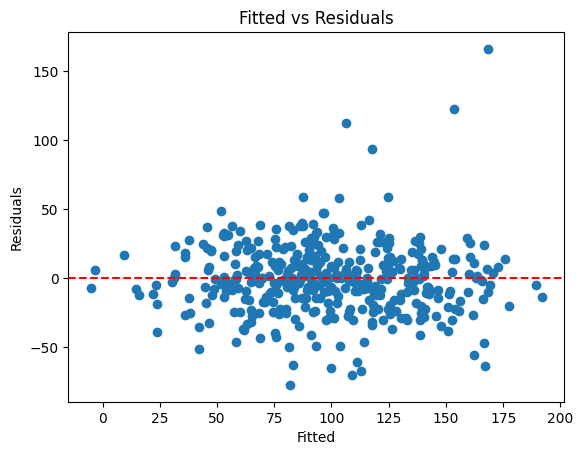

In [35]:
plt.scatter(fitted, residuals)
plt.axhline(0, linestyle='--', c='red')
plt.title('Fitted vs Residuals')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.show()

The residual plot suggests that the linear regression model is generally well-fitted, with residuals randomly distributed around zero and no strong systematic patterns. However, slight heteroscedasticity and a few outliers indicate that predictions for higher-priced houses may be less stable.

## Regularisation
(Ridge & LASSO) 
Standard scaler scales the mean and standard dev between 0 and 1 
minmax scaler scales the mean and standard in the range of 0 and 1

for linear reg.. we use standard scaler

In [36]:
# scaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [37]:
# fit with ridg and lasso 

ridge = Ridge(alpha=0.0001, random_state=42, max_iter=100000)
lasso = Lasso(alpha=0.0001, random_state=42, max_iter=100000)

ridge.fit(x_train_scaled, y_train)
lasso.fit(x_train_scaled, y_train)

,alpha,0.0001
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,100000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


In [38]:
ridge_train_pred = ridge.predict(x_train_scaled)
ridge_test_pred = ridge.predict(x_test_scaled)


In [39]:

lasso_train_pred = lasso.predict(x_train_scaled)
lasso_test_pred = lasso.predict(x_test_scaled)

In [40]:
print('ridge train r2', r2_score(y_train, ridge_train_pred))
print('ridge test r2', r2_score (y_test, ridge_test_pred ))

ridge train r2 0.6677627500746843
ridge test r2 0.6594076904520004


R² values are almost identical to Linear Regression.

Slightly lower train R² than baseline → expected because:

Ridge penalizes large coefficients

Reduces model complexity

In [41]:
print('lasso train r2', r2_score(y_train, lasso_train_pred))
print('lasso test r2', r2_score (y_test, lasso_test_pred ))

lasso train r2 0.6677627499713281
lasso test r2 0.6594080243104659


R² is virtually the same as Ridge and Linear Regression.

LASSO may have:

Reduced some coefficients to zero

Performed implicit feature selection

In [42]:
lasso_coef = pd.Series(lasso.coef_, index=X_train.columns).sort_values()
lasso_coef

Distance_to_CityCenter    -16.988536
House_Age                  -9.535630
Crime_Rate                 -6.575805
Noise_Level                -3.675570
Renovated                   0.088560
Nearby_Schools              0.171472
Energy_Efficiency_Score     4.154574
Garden_Size                 4.408880
Lot_Size                    6.462867
Monthly_Income              7.073810
Bathrooms                   7.295769
Bedrooms                   16.152194
dtype: float64

In [43]:
ridge_coef = pd.Series(ridge.coef_, index=X_train.columns).sort_values()
ridge_coef

Distance_to_CityCenter    -16.989349
House_Age                  -9.535712
Crime_Rate                 -6.575659
Noise_Level                -3.676362
Renovated                   0.088623
Nearby_Schools              0.171529
Energy_Efficiency_Score     4.154593
Garden_Size                 4.408979
Lot_Size                    6.462920
Monthly_Income              7.073945
Bathrooms                   7.295827
Bedrooms                   16.152211
dtype: float64

The baseline linear regression model achieved an R² of approximately 0.66 on both training and test sets, indicating good generalization. Ridge and LASSO regression produced nearly identical R², MSE, and RMSE values, suggesting that regularization did not significantly improve predictive accuracy. However, Ridge improved coefficient stability, while LASSO enhanced model interpretability through feature selection, making both valuable despite similar performance.

## SUMMARY AND INSIGHT 
The regression coefficients indicate that house prices increase with key structural and socioeconomic features, as the number of bedrooms (β = 16.15), bathrooms (β = 7.30), monthly income (β = 7.07), lot size (β = 6.46), garden size (β = 4.41), and energy efficiency score (β = 4.15) all have positive coefficients, suggesting that larger homes in wealthier neighborhoods with better amenities and efficiency command higher prices. In contrast, house prices decrease as distance to the city center (β = −16.99), house age (β = −9.54), crime rate (β = −6.58), and noise level (β = −3.68) increase, indicating that location, safety, environmental quality, and property condition are significant negative determinants of housing value.